/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


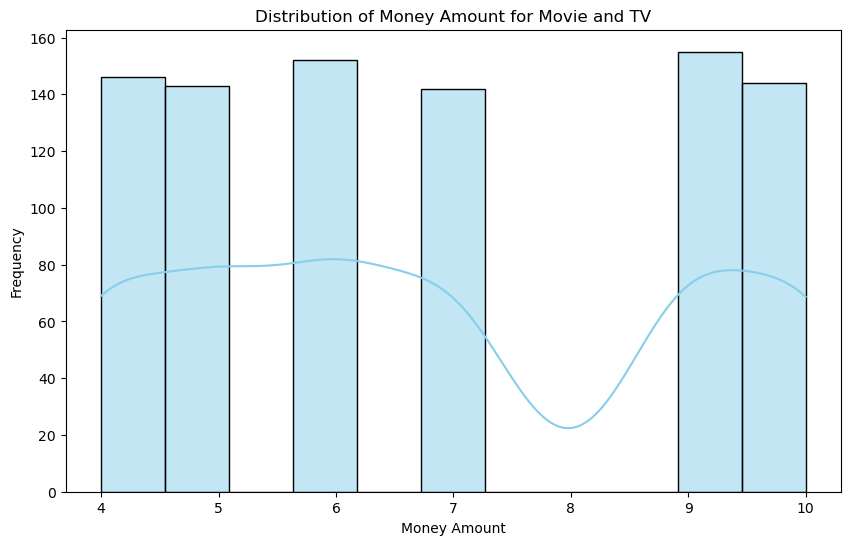

Category Movie and TV - Estimated mean: 6.85, Estimated standard deviation: 2.11



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


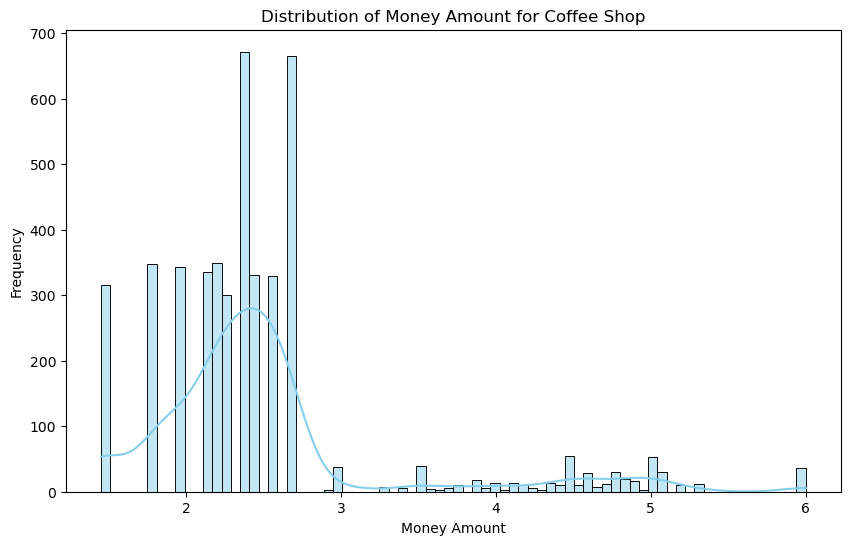

Category Coffee Shop - Estimated mean: 2.50, Estimated standard deviation: 0.82



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


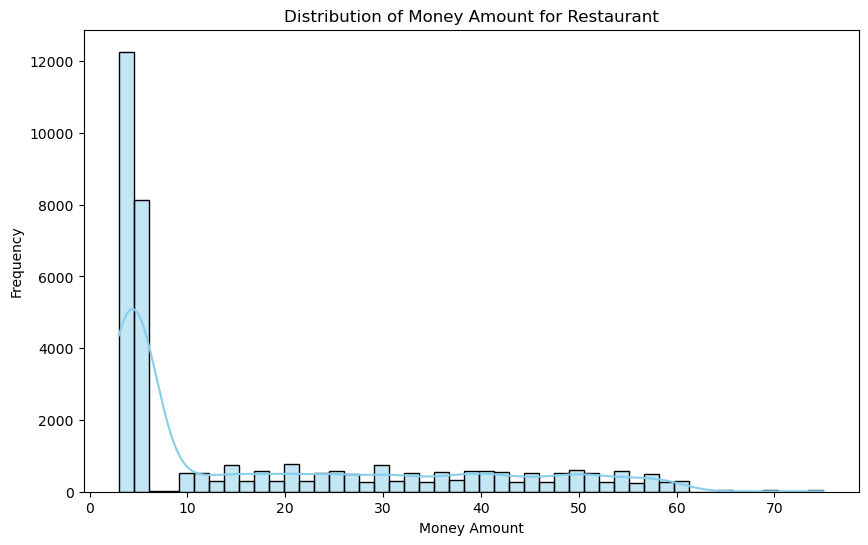

Category Restaurant - Estimated mean: 17.38, Estimated standard deviation: 17.84



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


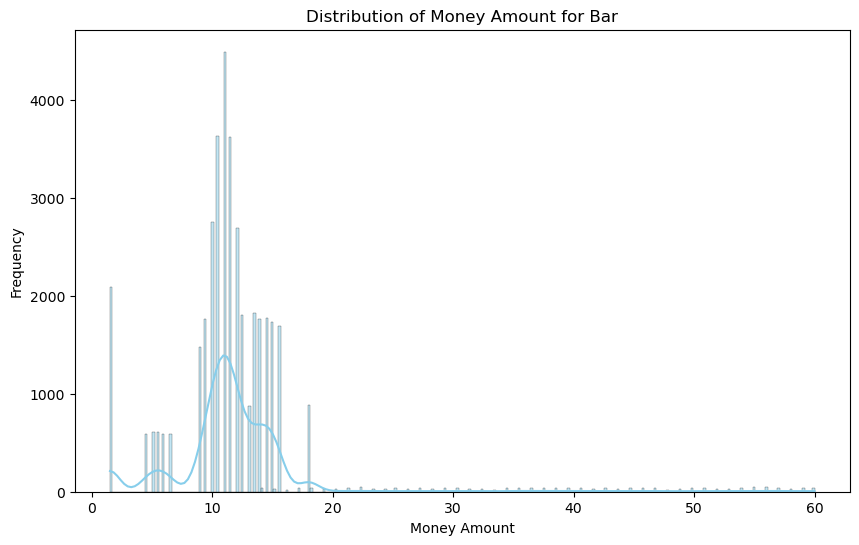

Category Bar - Estimated mean: 12.02, Estimated standard deviation: 6.75



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


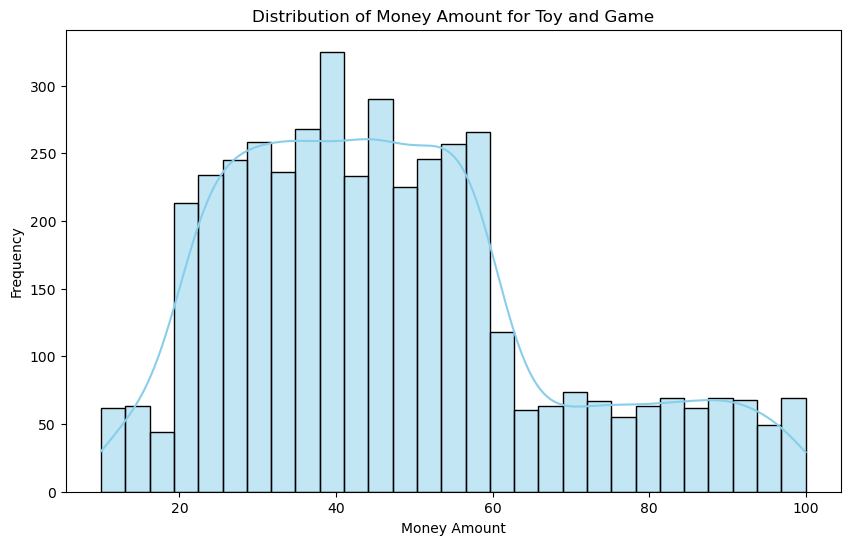

Category Toy and Game - Estimated mean: 46.78, Estimated standard deviation: 20.26



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


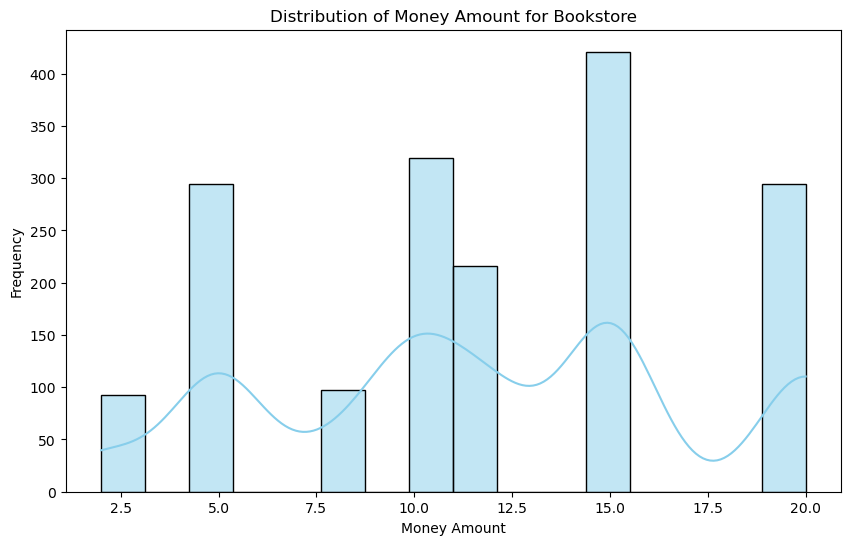

Category Bookstore - Estimated mean: 11.77, Estimated standard deviation: 5.32



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


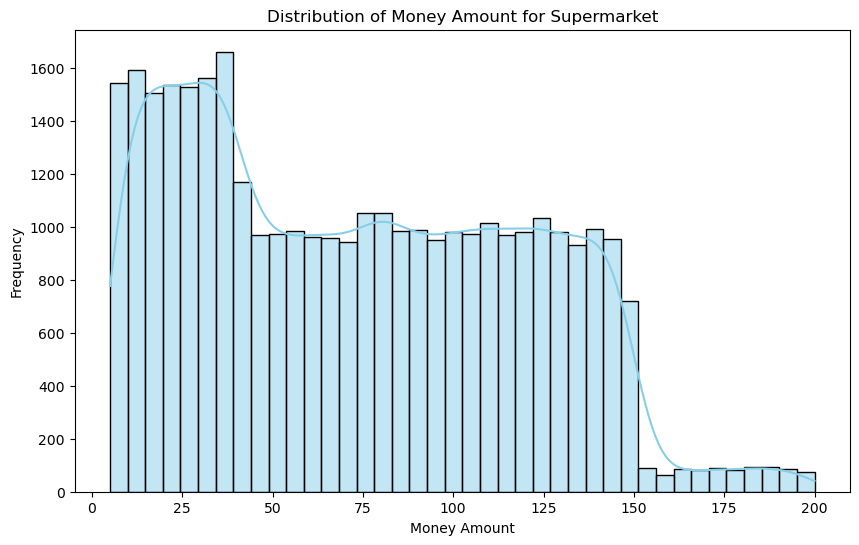

Category Supermarket - Estimated mean: 73.12, Estimated standard deviation: 45.66



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


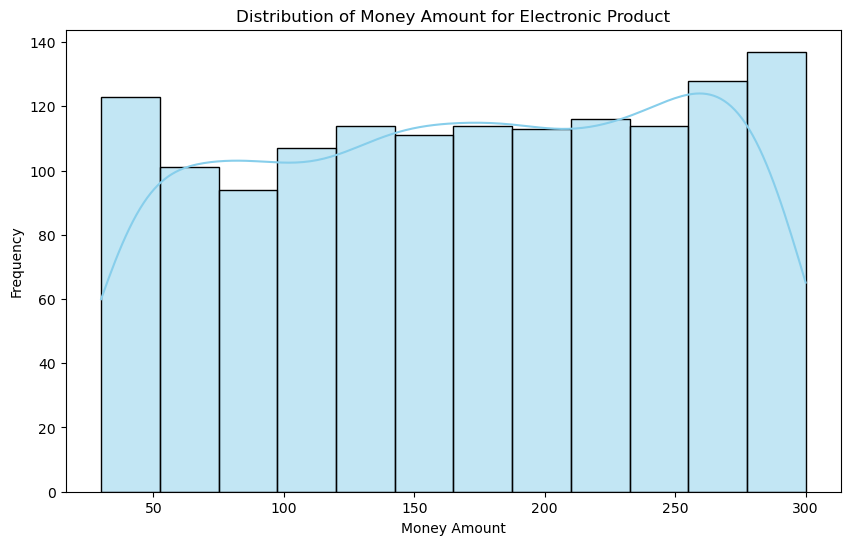

Category Electronic Product - Estimated mean: 169.40, Estimated standard deviation: 79.37



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


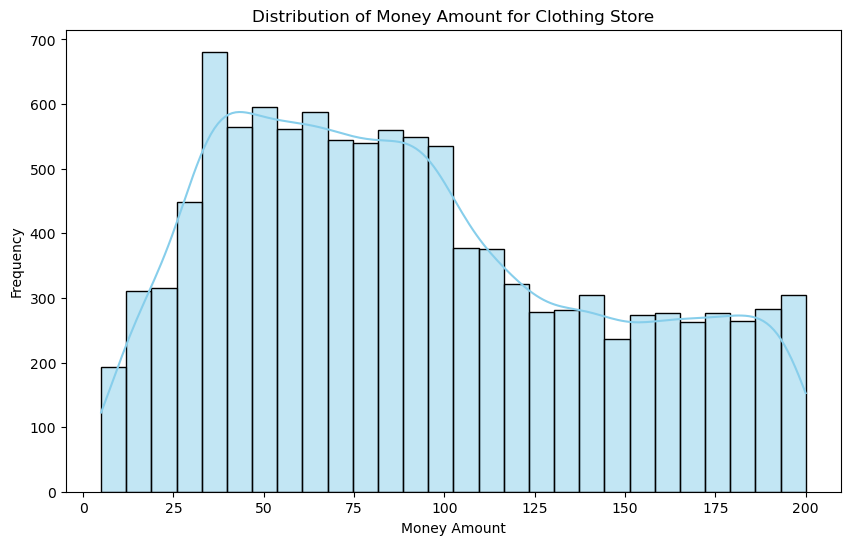

Category Clothing Store - Estimated mean: 91.93, Estimated standard deviation: 51.61



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


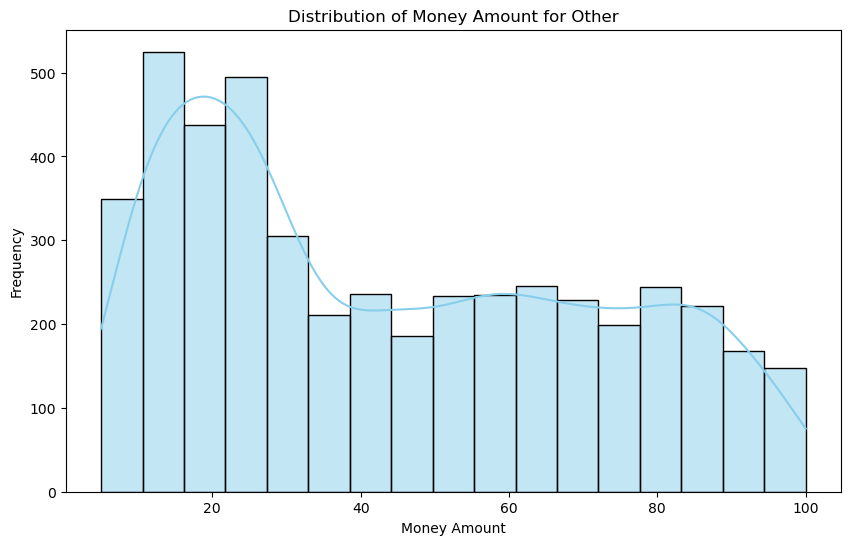

Category Other - Estimated mean: 44.14, Estimated standard deviation: 27.43



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


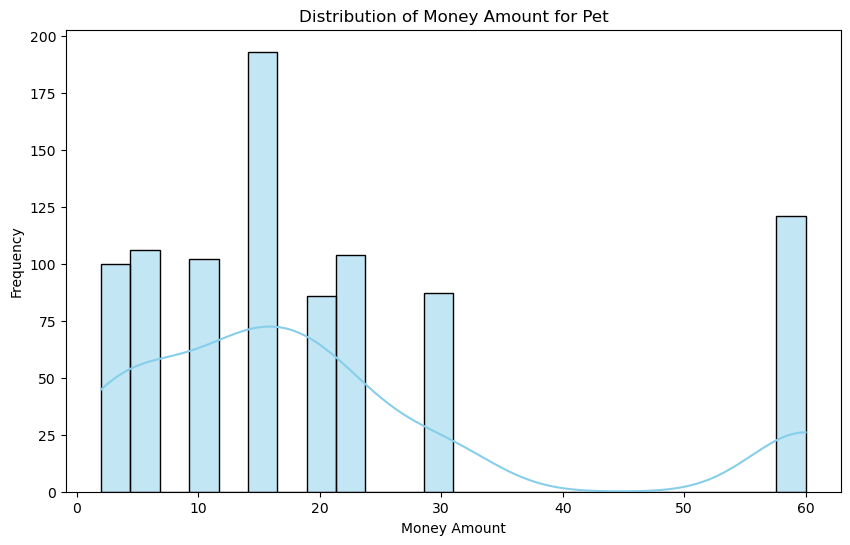

Category Pet - Estimated mean: 20.60, Estimated standard deviation: 17.45



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


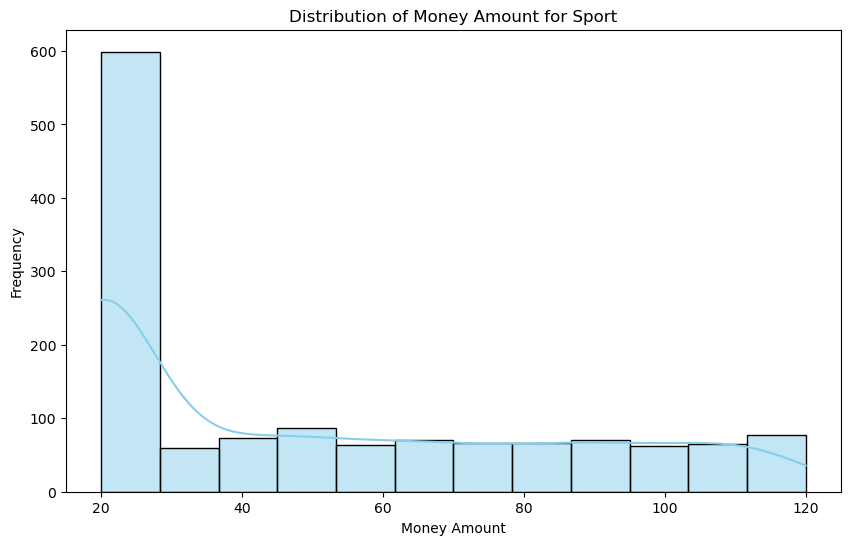

Category Sport - Estimated mean: 50.17, Estimated standard deviation: 33.31



/Users/leichen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


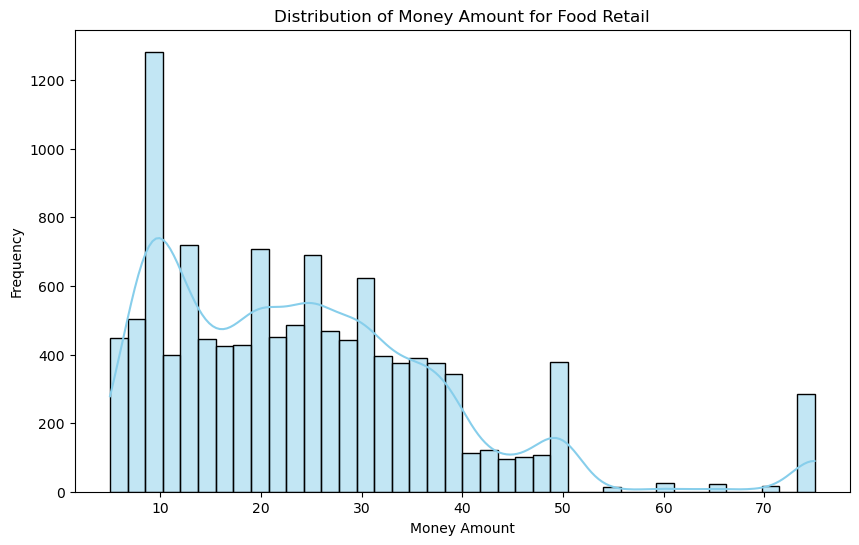

Category Food Retail - Estimated mean: 24.41, Estimated standard deviation: 14.48



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# loaded dataset into 'df'.
csv_file_path = 'consumption.csv'
df = pd.read_csv(csv_file_path)

# Splitting the dataset into training (first 80%) and test (last 20%) sets
train_df = df.iloc[:int(len(df)*0.8)]
test_df = df.iloc[int(len(df)*0.8):]

# Extracting all unique categories from 'type_I' column
all_categories = df['type_I'].unique()

# Calculating a portion of the total sample, e.g., 10% of the test set
total_sample_size = int(len(test_df) * 0.1)

# Calculating variances and sizes for each category in 'type_I'
variances = test_df.groupby('type_I')['money_amount'].var().fillna(0)
sizes = test_df['type_I'].value_counts()

# Calculating sample sizes for each category using Neyman allocation
neyman_sample_sizes = {}
total_sqrt_variance_size = sum(np.sqrt(variances) * sizes)
for category in all_categories:
    category_variance = variances.get(category, 0)
    category_size = sizes.get(category, 0)
    if category_variance > 0 and category_size > 0:
        sample_size = np.ceil((np.sqrt(category_variance) * category_size / total_sqrt_variance_size) * total_sample_size)
        neyman_sample_sizes[category] = int(sample_size)
    else:
        neyman_sample_sizes[category] = 0  # Assign 0 sample size to indicate skipping

# Analyzing each category
for category, sample_size in neyman_sample_sizes.items():
    if sample_size > 0:
        samples = test_df[test_df['type_I'] == category].sample(n=sample_size, random_state=42)
        
        # EDA: Plotting histograms
        plt.figure(figsize=(10, 6))
        sns.histplot(samples['money_amount'], kde=True, color='skyblue')
        plt.title(f'Distribution of Money Amount for {category}')
        plt.xlabel('Money Amount')
        plt.ylabel('Frequency')
        plt.show()
        
        # Example of distribution fitting: Fitting a normal distribution
        mu, std = stats.norm.fit(samples['money_amount'])
        print(f"Category {category} - Estimated mean: {mu:.2f}, Estimated standard deviation: {std:.2f}\n")


In social science, market research, or similar fields, it is common practice to use a 95% confidence level and a 5% margin of error (i.e., the maximum acceptable error). These parameters reflect the reliability and precision of the research findings. The higher the confidence level, the more confident we are in the results; the smaller the margin of error, the more precise our estimates. However, improving these two parameters typically results in an increase in the required sample size.

### Parameter Selection
- **Confidence Level** (\(Z\) value): For a 95% confidence level, the \(Z\) value is approximately 1.96.
- **Margin of Error** (\(E\)): Generally, 5% or 0.05 is a common choice.
- **Population Standard Deviation** (\(\sigma\)): We can calculate based on data provided previously by Lloyds Bank and continuously optimize this estimate.

### Sample Size Calculation Formula
$$
N = \left( \frac{Z \times \sigma}{E} \right)^2
$$

Where:
- `N` is the total sample size.
- `Z` is the z-score associated with the desired confidence level (e.g., 1.96 for 95% confidence).
- `\sigma` is the estimated population standard deviation. If not known, for the estimation of proportions, `\sigma^2` can be replaced with `p(1-p)`, where `p` is the expected proportion. In cases of maximum uncertainty, `p = 0.5` is used to ensure the largest possible variance, giving a conservative sample size estimate.
- `E` is the margin of error (the maximum acceptable difference between the sample statistic and the population parameter).

For the estimation of proportions, if we do not have enough information to determine \(\sigma\), we can use \(p(1-p)\) to replace \(\sigma^2\), where \(p\) is the expected proportion. In the most uncertain scenario, \(p=0.5\).

### Example Calculation
Assuming we do not have enough information to estimate \(\sigma\), using the most conservative estimate, for a 95% confidence level and a 5% margin of error, we have:

- \(Z = 1.96\)
- \(E = 0.05\)
- \(\sigma = 0.5\) (the largest standard deviation for binomial distribution, used for estimating proportion)

With a 95% confidence level and a 5% margin of error, and using the most conservative estimate of population standard deviation (0.5), the calculated minimum total sample size is approximately 384.16. This means to meet these parameter settings, we would need at least 385 samples (rounding up) for our study.

**Based on the analysis, here are the estimated means and standard deviations for money amounts spent in various categories (type_I) of transactions:**

| Category           | Estimated Mean | Estimated Std Dev |
|--------------------|----------------|-------------------|
| **Movie and TV**   | 6.86           | 2.29              |
| **Coffee Shop**    | 2.46           | 0.57              |
| **Restaurant**     | 21.20          | 18.44             |
| **Bar**            | 12.03          | 6.51              |
| **Toy and Game**   | 51.97          | 24.38             |
| **Bookstore**      | 11.35          | 4.93              |
| **Supermarket**    | 76.63          | 45.13             |
| **Electronic Product** | 204.89      | 84.31             |
| **Clothing Store** | 89.76          | 52.25             |
| **Other**          | 43.18          | 27.49             |
| **Pet**            | 22.00          | 18.93             |
| **Sport**          | 65.80          | 23.71             |
| **Food Retail**    | 22.80          | 15.41             |

This analysis gives an insight into the spending patterns across different categories, highlighting how amounts vary significantly from one category to another, with **"Electronic Product" transactions showing the highest average spending and associated variance**, and **"Coffee Shop" transactions showing the lowest average spending**.
​​

### Neyman stratification sampling method

Based on the Neyman stratification sampling method, the calculated sample sizes for each category are as follows:

The Neyman allocation formula used to calculate the sample sizes is given by:

$$n_i = N \times \frac{W_i \times S_i}{\sum_{j=1}^{L} W_j \times S_j}$$

Where:
- $n_i$ is the sample size for the i-th stratum.
- $N$ is the total sample size desired.
- $W_i$ is the relative size of the i-th stratum (the size of the stratum divided by the total size).
- $S_i$ is the standard deviation within the i-th stratum.
- $L$ is the total number of strata.
- $\sum_{j=1}^{L} W_j \times S_j$ is the sum of the product of relative sizes and standard deviations for all strata, acting as a normalization factor to ensure that the sum of all stratum sample sizes equals $N$.

| Category               | Neyman Sample Size |
|------------------------|-------------------|
| **Movie and TV**       | 7                 |
| **Coffee Shop**        | 24                |
| **Restaurant**         | 510               |
| **Bar**                | 884               |
| **Toy and Game**       | 33                |
| **Bookstore**          | 17                |
| **Supermarket**        | 318               |
| **Electronic Product** | 9                 |
| **Clothing Store**     | 86                |
| **Other**              | 44                |
| **Pet**                | 6                 |
| **Sport**              | 5                 |
| **Food Retail**        | 63                |

These sample sizes are calculated using the Neyman stratification sampling method, taking into account the variance and relative size of each category. Compared to a direct allocation method, the Neyman approach optimizes sample size distribution by considering the variance within layers and the size of the layers, thereby more effectively reducing the variance of the overall estimate. This means that categories with larger variances or relative sizes are allocated more samples to ensure accuracy and efficiency in the analysis.


### Bayesian optimization

In our approach, we leverage the test dataset as a critical tool for assessing the performance of our machine learning models. By carefully analyzing the results obtained on this unseen data, we can gauge the generalizability and robustness of our models in real-world scenarios. To further enhance the effectiveness of our models, we integrate Bayesian optimization techniques, a powerful strategy rooted in Bayesian inference.

Bayesian optimization stands out for its efficiency in navigating complex optimization landscapes. It employs probabilistic models, typically Gaussian Processes, to model the relationship between model hyperparameters and the objective metric. This probabilistic framework allows for a more informed search of the hyperparameter space, focusing on those regions most likely to yield improvements. By leveraging acquisition functions, such as Expected Improvement, Bayesian optimization systematically balances the exploration of new, promising hyperparameter configurations with the exploitation of already known good configurations.

This strategic integration of Bayesian optimization, guided by the insights gained from the test dataset, empowers us to fine-tune our models more effectively. Not only does it significantly reduce the number of iterations needed to identify optimal hyperparameter settings, but it also enhances the overall predictive performance of our models. Through this approach, we aim to achieve higher accuracy, better generalization to new data, and improved model reliability in addressing complex predictive tasks.


In [ ]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from skopt import gp_minimize  

# Load some data to use for the example
X, y = load_iris(return_X_y=True)

# Define the hyperparameter space
space  = [Real(1e-6, 1e+1, prior='log-uniform', name='learning_rate'),
          Integer(1, 30, name='max_depth')]

# Define the objective function
@use_named_args(space)
def objective(**params):
    clf = RandomForestClassifier(**params, random_state=0)
    return -cross_val_score(clf, X, y, cv=5, n_jobs=-1, scoring='accuracy').mean()

# Run Bayesian optimization
res_gp = gp_minimize(objective,                  # The objective function
                     space,                      # The search space for hyperparameters
                     n_calls=50,                 # The number of times to run the objective function
                     random_state=0)

# Output the best hyperparameters
print("Best parameters:", res_gp.x)


In [ ]:
best_params = {dim.name: val for dim, val in zip(space, res_gp.x)}
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(train_df.drop('money_amount', axis=1), train_df['money_amount'])

# Evaluate model performance on the test set.

In Bayesian optimization, the core theory and computations primarily involve formulas related to several key aspects:

### Gaussian Process (GP)
A Gaussian Process is a tool used in Bayesian optimization to build a probabilistic model of the objective function. It's used to predict the target function value and its uncertainty (usually expressed as mean and variance) at any point. The Gaussian Process can be represented as follows, which places the formula in display mode for added emphasis:

$$
f(x) \sim \mathcal{GP}(m(x), k(x, x'))
$$

Here, \(f(x)\) is the function value at point \(x\), \(m(x)\) is the mean function, often assumed to be zero (unless there's prior knowledge), and \(k(x, x')\) is the kernel function (or covariance function), measuring the similarity between two points \(x\) and \(x'\) in the input space.

### Acquisition Function
The acquisition function is used to decide the location of the next evaluation point \(x\) given the current Gaussian Process model. One common acquisition function is the Expected Improvement (EI), which is formulated as:

$$
EI(x) = \mathbb{E}[\max(f(x) - f(x^+), 0)]
$$

In this formula, \(f(x^+)\) represents the best function value observed so far, and \(\mathbb{E}[\cdot]\) denotes the expectation. The expected improvement quantifies the balance between the potential for improvement over the current best and the exploration of areas with high uncertainty.


### Optimization Process
The iterative process of Bayesian optimization can be summarized as:
1. Use the current Gaussian Process model to predict the performance and uncertainty of each point.
2. Choose the next evaluation point by maximizing the acquisition function.
3. Evaluate the objective function at the chosen point, updating the Gaussian Process model.
4. Repeat steps 1-3 until convergence criteria are met.

The key to the Bayesian optimization process lies in how to choose the kernel function \(k(x, x')\) and how to compute and maximize the acquisition function. The choice of kernel function determines the model's assumptions about the shape of the function, while the computation and maximization of the acquisition function involve solving a numerical optimization problem, typically using ready-made numerical optimization libraries.

The Gaussian Process and Expected Improvement formulas mentioned above are the most central mathematical concepts in Bayesian optimization, together supporting the theoretical foundation for optimizing complex functions using Bayesian theory.
